Advertising Sales Channel Prediction

# The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  This is a Regression problem

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
Sales=pd.read_csv('Sales Prediction.csv')

In [5]:
Sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [19]:
df=pd.read_csv('Sales Prediction.csv',index_col=0)

In [20]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


There are in total 200 records and 4 columns. The output(target) varaiable is sales which is continuous in nature so it is problem of regresssion.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


 There are no null values present in any of the features. The datatype of all the features are float.

<AxesSubplot:>

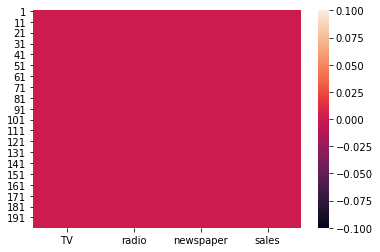

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


For the feature named as TV it is having left tailed skewness as median is greater than mean. Further, the feature radio and newspaper are having right tailed skewness as mean is greater than median.

There are chances of outliers present in newspaper feature as there is a hugh difference between 75% and max value of that feature.

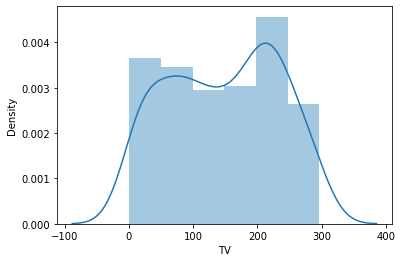

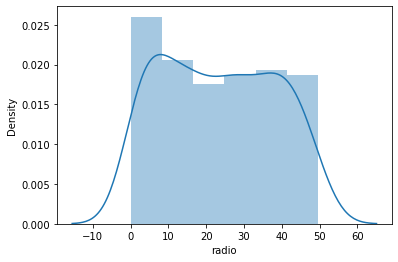

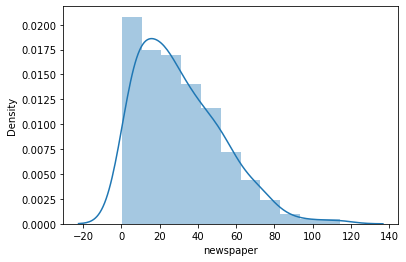

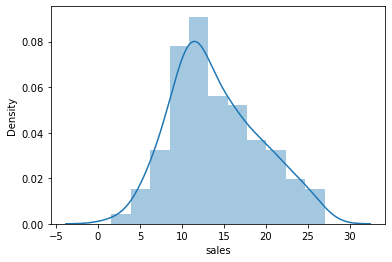

In [27]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

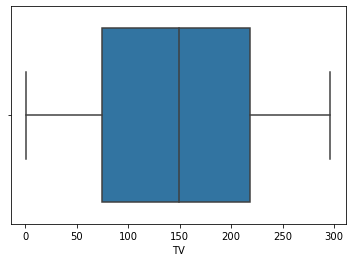

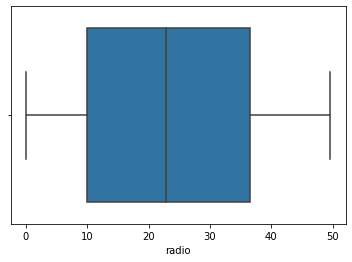

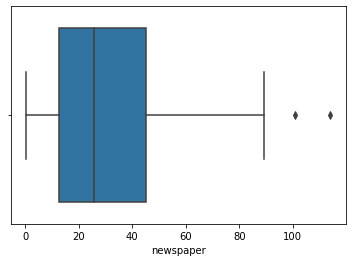

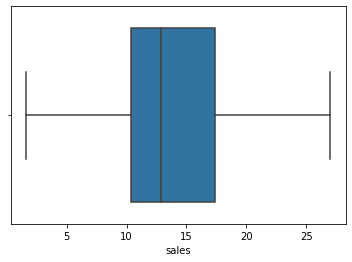

In [28]:
for i in df.columns:
    plt.figure()
    sns.boxplot(df[i])
    plt.show()

There are outliers present in newspaper feature which has been confirmed from box plot.

<AxesSubplot:xlabel='TV', ylabel='sales'>

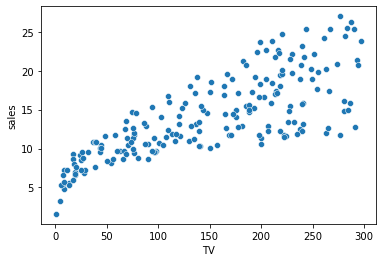

In [30]:
sns.scatterplot(x='TV',y='sales',data=df)

There is a positive linear correlation between TV feature and sales feature. Further, more the amount of money pumped for advertisement on TV better are the sales figure.

<AxesSubplot:xlabel='radio', ylabel='sales'>

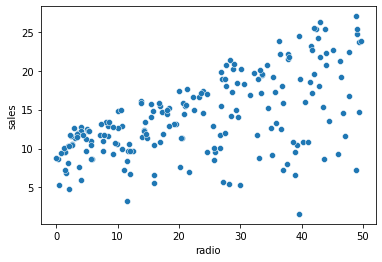

In [31]:
sns.scatterplot(x='radio',y='sales',data=df)

There is a positive linear correlation between radio and sales feature. 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

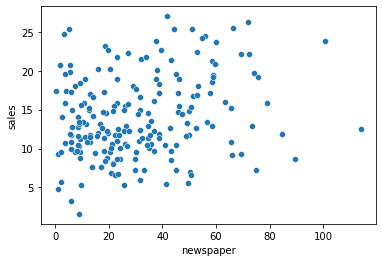

In [35]:
sns.scatterplot(x='newspaper',y='sales',data=df)

There is a positive linear correlation between newspaper  and sales feature. Further,the amount of correlation i.e how much positive is less as comnpared to other feattures.

In [39]:
df[df['radio']==0]['radio'].count()

1

In [41]:
pd.crosstab(df['TV'],df['sales'],margins=True)

sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0,All
TV,,,,,,,,,,,,,,,,,,,,,
0.7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7.8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
292.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
293.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


From the above crosstab it is confirmed that as the amount spent in advertisement on TV increases sales increases.

In [47]:
pd.crosstab(df['radio'],df['sales'],margins=True)

sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0,All
radio,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
49.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
49.4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2


From the above crosstab it is confirmed that as the amount spent in advertisement on radio increases sales increases in most of the cases and drops down in few of the cases.

In [49]:
pd.crosstab(df['newspaper'],df['sales'],margins=True)

sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0,All
newspaper,,,,,,,,,,,,,,,,,,,,,
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
89.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100.9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


From the above crosstab it is confirmed that as the amount spent in advertisement on newspaper increases sales increases in some of the cases and drops down in few of the cases. Further, it can be said that newspaper is having positive correlation with sales but the amount of correlation is less.

<AxesSubplot:>

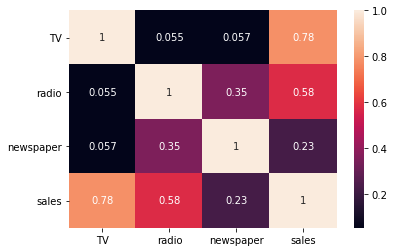

In [50]:
sns.heatmap(df.corr(),annot=True)

The TV feature is having highest correlation with sales, followed by radio and newspaper.

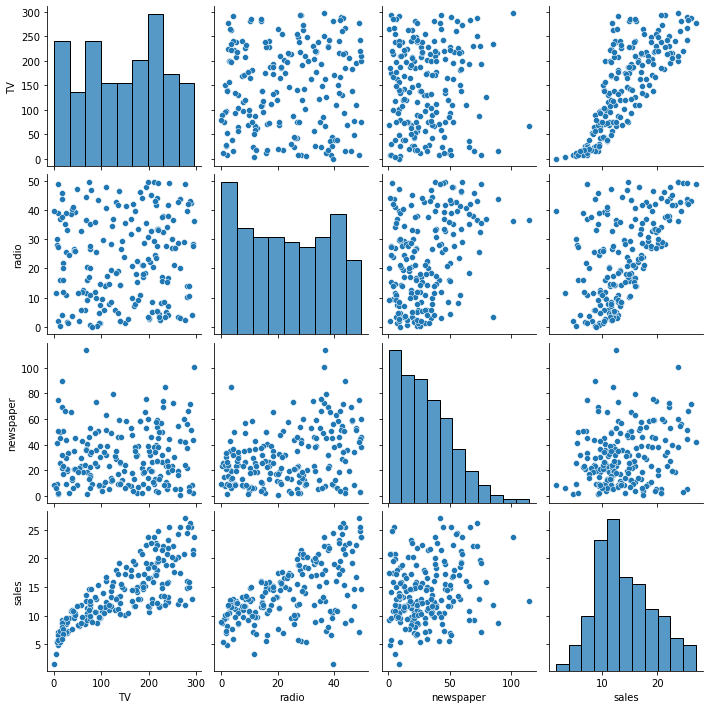

In [53]:
sns.pairplot(df)

<AxesSubplot:xlabel='radio', ylabel='newspaper'>

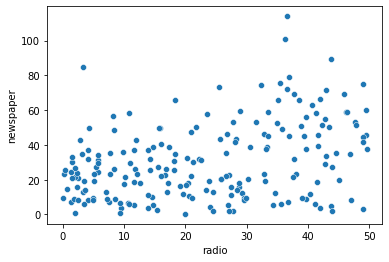

In [54]:
sns.scatterplot(x='radio',y='newspaper',data=df)

 As the amount spend on TV for adverstisement increases corresponding the amount spent on radio for advertisement increases in some of the cases and drops in some of the cases. Further, there is a linear correlation but the amount of correleation is less which is 0.35

In [55]:
Q1=df['newspaper'].quantile(0.25)
Q3=df['newspaper'].quantile(0.75)
IQR=Q3-Q1
upper_boundary=Q3+1.5*IQR

In [56]:
upper_boundary

93.625

In [57]:
df[df['newspaper']>93]['newspaper'].count()

2

So there are only 2 records in newspaper feature having values greater than 93 which is the upper_boundary(whisker). Further, as no of outliers are 2 only there is no point in removing them.

In [59]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

The skewness in newspaper feature is greater than 0.5 which needs to be treated.

In [63]:
df['newspaper']=np.sqrt(df['newspaper'])

In [64]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
sales        0.407571
dtype: float64

SKewness has been treated.

In [65]:
x=df.drop('sales',axis=1)
y=df['sales']

In [66]:
se=StandardScaler()
x=se.fit_transform(x)

In [68]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print(np.sqrt(mean_squared_error(y_test,pred)))
    print("The r2 score for random state",i,"=",r2_score(y_test,pred))

1.0489101880153537
2.0093566475862894
1.4175177768149116
The r2 score for random state 1 = 0.891819980203109
1.6635363667159546
4.557296671235159
2.1347825817246964
The r2 score for random state 2 = 0.7546733523075342
1.2070279505735848
2.188635270478886
1.4794036874629204
The r2 score for random state 3 = 0.9124431849056786
1.2145290522229444
2.224960690273633
1.4916302123092149
The r2 score for random state 4 = 0.9082554516311409
1.2659401554524634
2.54752762091516
1.5960976226143437
The r2 score for random state 5 = 0.898557314658452
1.0579501085787082
1.8810350549085009
1.3715083138313455
The r2 score for random state 6 = 0.9209209716361928
1.1486540668784606
2.4299113733913273
1.5588172995548026
The r2 score for random state 7 = 0.909523758386436
1.46504151445541
4.2901682880582515
2.071272142442478
The r2 score for random state 8 = 0.8470479164016581
1.0702420263505932
1.8291194484636262
1.3524494254735095
The r2 score for random state 9 = 0.9258940580724901
1.8879266414704623
6.

For random state 92 ,i am getting the r2_score of 95% so i will take random_state=92

In [70]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=92)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
print(mean_absolute_error(y_test,pred1))
print(mean_squared_error(y_test,pred1))
print(np.sqrt(mean_squared_error(y_test,pred1)))
print(r2_score(y_test,pred1))

0.9429562258152103
1.5007759432601797
1.2250616079447514
0.9514095674628553


In [73]:
from sklearn.ensemble import RandomForestRegressor
models=[DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for i in models:
    m=i
    m.fit(x_train,y_train)
    pred2=m.predict(x_test)
    print(mean_absolute_error(y_test,pred1))
    print(mean_squared_error(y_test,pred1))
    print(np.sqrt(mean_squared_error(y_test,pred1)))
    print(i,"=",r2_score(y_test,pred1))
    print()

0.9429562258152103
1.5007759432601797
1.2250616079447514
DecisionTreeRegressor() = 0.9514095674628553

0.9429562258152103
1.5007759432601797
1.2250616079447514
SVR() = 0.9514095674628553

0.9429562258152103
1.5007759432601797
1.2250616079447514
KNeighborsRegressor() = 0.9514095674628553

0.9429562258152103
1.5007759432601797
1.2250616079447514
RandomForestRegressor() = 0.9514095674628553

0.9429562258152103
1.5007759432601797
1.2250616079447514
AdaBoostRegressor() = 0.9514095674628553

0.9429562258152103
1.5007759432601797
1.2250616079447514
GradientBoostingRegressor() = 0.9514095674628553



# checking out the cross val score

In [77]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print(score.mean())

0.8873331295445761


In [78]:
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score.mean())

0.950204508320447


In [79]:
score=cross_val_score(SVR(),x,y,cv=5)
print(score.mean())

0.9011953652320344


In [80]:
score=cross_val_score(KNeighborsRegressor(),x,y,cv=5)
print(score.mean())

0.9370596549659117


In [83]:
score=cross_val_score(RandomForestRegressor(),x,y,cv=5)
print(score.mean())

0.9756108920684889


In [84]:
score=cross_val_score(AdaBoostRegressor(),x,y,cv=5)
print(score.mean())

0.9543422692935788


In [85]:
score=cross_val_score(GradientBoostingRegressor(),x,y,cv=5)
print(score.mean())

0.9777277080747597


As i am getting r2_score of 90% in all the models have to checked out whether the model is overfitting or not using regulization techniqiues Lasso and Ridge.

In [88]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
pred4=ls.predict(x_test)
print(mean_absolute_error(y_test,pred4))
print(mean_squared_error(y_test,pred4))
print(np.sqrt(mean_squared_error(y_test,pred4)))
print(r2_score(y_test,pred4))

0.9429448476436505
1.5007622836123593
1.2250560328459916
0.9514100097195419


In [89]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
pred5=rd.predict(x_test)
print(mean_absolute_error(y_test,pred5))
print(mean_squared_error(y_test,pred5))
print(np.sqrt(mean_squared_error(y_test,pred5)))
print(r2_score(y_test,pred5))

0.9429565270944001
1.5007767692567704
1.2250619450692157
0.9514095407196684


In [90]:
score=cross_val_score(ls,x,y,cv=5)
print(score.mean())

0.8873359634216254


In [91]:
score=cross_val_score(rd,x,y,cv=5)
print(score.mean())

0.8873331387500674


Based on the difference of the r2_score and cross_val_score AdaBoostingRegressor and Decision Tree Classifier are my best models: 

Hypertuning is required to find the best model

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
params={'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features':['sqrt','auto']}

In [99]:
re=RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'max_features': 'auto', 'max_depth': 9}

In [101]:
dtc=DecisionTreeRegressor(max_features='auto',max_depth=9)
dtc.fit(x_train,y_train)
pred6=dtc.predict(x_test)
print(mean_absolute_error(y_test,pred6))
print(mean_squared_error(y_test,pred6))
print(np.sqrt(mean_squared_error(y_test,pred6)))
print(r2_score(y_test,pred6))

0.7399999999999999
0.9354999999999997
0.9672124895802368
0.969711435046225


In [107]:
params={'n_estimators':[10,20,30,40,50],'learning_rate':[1,0.1,.01,.001,.0001]}

In [108]:
re=RandomizedSearchCV(AdaBoostRegressor(),param_distributions=params,n_jobs=-1,cv=5)
re.fit(x_train,y_train)
re.best_params_

{'n_estimators': 10, 'learning_rate': 1}

In [112]:
ada=AdaBoostRegressor(n_estimators=10, learning_rate=1)
ada.fit(x_train,y_train)
pred7=ada.predict(x_test)
print(mean_absolute_error(y_test,pred7))
print(mean_squared_error(y_test,pred7))
print(np.sqrt(mean_squared_error(y_test,pred7)))
print(r2_score(y_test,pred7))

1.174266266229533
2.4320175177923544
1.5594927116829864
0.9212588770108261


# Decision Tree Regressor is my best model having r2_score of 97%

Text(0.5, 1.0, 'linear Regression')

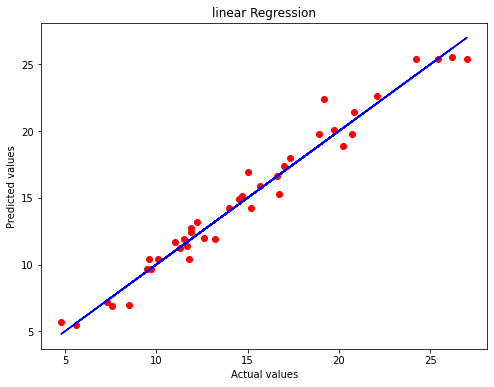

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred6,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("linear Regression")

In [114]:
import joblib

In [115]:
joblib.dump('dtc','sales Prediction.obj')

['sales Prediction.obj']

In [117]:
joblib.load('sales Prediction.obj')

'dtc'